In [1]:
import yfinance as yf 
import datetime 
import pandas as pd 
import numpy as np 
pd.core.common.is_list_like = pd.api.types.is_list_like #
import pandas_datareader as pdr 
yf.pdr_override()
import matplotlib.pyplot as plt

# Task1

In [2]:
start = datetime.datetime(2017, 1, 1) 
end = datetime.datetime(2018, 1, 1)

In [3]:
def get_tickers():
    f = open('Stocks.txt')
    tickers = []
    for line in f:
        tickers.append(line[0:len(line)-1])
    f.close()
    return tickers

def data_for_ticker(ticker):
    return yf.download([ticker], start=start, end=end)

In [4]:
def generate_frames():
    f = open('Stocks.txt')
    frames = dict()
    for line in f:
        ticker = line[0:len(line)-1]
        frames[ticker] = data_for_ticker(ticker)
    f.close()
    return frames

def get_frame(ticker, frames):
    return frames[ticker]

In [5]:
allTickers = get_tickers()

In [6]:
allFrames = generate_frames()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

# Task2

In [8]:
def compute_return(frames):
    for ticker in frames:
        frame = frames[ticker]
        pt = frame["Adj Close"][1:].values
        pt_1 = frame["Adj Close"][:-1].values
        ret = np.log(pt / pt_1)
        frames[ticker]["Return"] = [np.NaN, *ret]
        
        #####################
        Ticker = yf.Ticker(ticker)
        frames[ticker]["Exchange"] = Ticker.info['fullExchangeName']
        
compute_return(allFrames)

In [9]:
def get_return_info(ticker):
    E = np.mean(allFrames[ticker]["Return"])
    sigma = np.std(allFrames[ticker]["Return"])
    return E, sigma

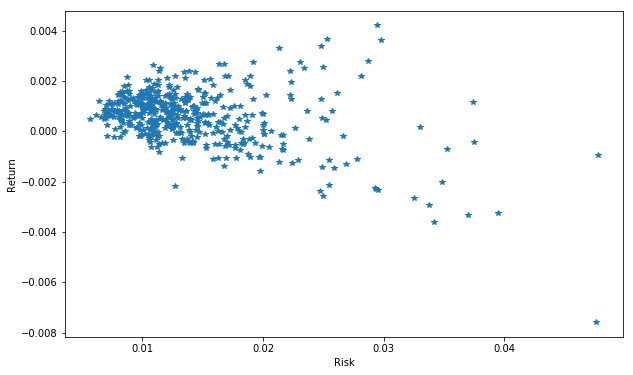

In [10]:
allReturns = []
allRisks = []
for tick in allTickers:
    ret,risk = get_return_info(tick)
    allReturns.append(ret)
    allRisks.append(risk)

plt.figure(figsize=(10,6))
plt.xlabel("Risk")
plt.ylabel("Return")
plt.plot(allRisks, allReturns,"*")
plt.show()

In [ ]:
Из данной карты активов видно, что большинство из них обладают невысокой доходностью и риском. 
Следовательно, при увеличении риска и доходности уменьшается плотность точек. 
При увеличении риска, абсолютное значение доходностей растет, то есть очень мало активов с высоким риском и близкой к 0 доходностью.
Есть активы с отрицательной доходностью, но нет тех, что обладают постоянной доходностью, то есть нулевым риском. 
Активы расположены почти симметрично относительно оси ОХ (линии нулевой доходности).

# Task 3 (put your code below)

# Task 4 

In [11]:
import copy


def find_good_actives(risks,returns,count):
    #return -> max
    return_count = count // 3
    ret = copy.deepcopy(returns)
    return_indices = find_max_ret(return_count,ret,[])
    #risk -> min
    risk = copy.deepcopy(risks)
    risk_indices = find_min_risk(count - return_count, risk,[])
    return [allTickers[index] for index in return_indices + risk_indices]

def find_max_ret(count,returns,accum):
    if count != 0:
        max_ret = allReturns.index(max(returns))
        returns.remove(allReturns[max_ret])
        accum.append(max_ret)
        find_max_ret(count - 1, returns, accum)
    return accum
    
def find_min_risk(count,risks,accum):
    #print("Count {}\nAccum {}\n".format(count,accum))
    if count != 0:
        min_risk = allRisks.index(min(risks))
        risks.remove(allRisks[min_risk])
        accum.append(min_risk)
        find_min_risk(count - 1, risks, accum)
    return accum

In [12]:
def plot_for_tickers(Tickers):
    rets=[]
    risks=[]
    for tick in Tickers:
        ret,risk = get_return_info(tick)
        rets.append(ret)
        risks.append(risk)
    
    plt.figure(figsize=(10,6))
    plt.xlabel("Risk")
    plt.ylabel("Return")
    plt.plot(risks, rets,"*")
    plt.show()

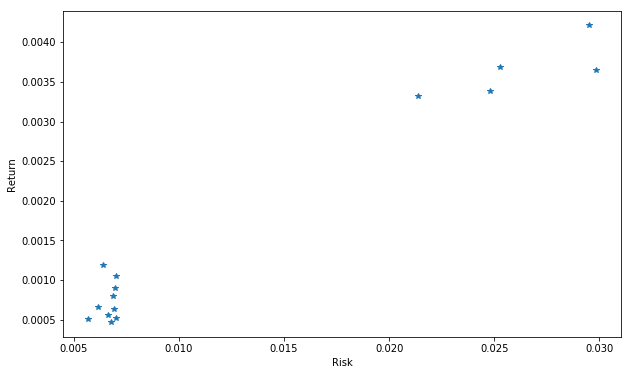

In [13]:
Tickers = find_good_actives(allRisks,allReturns,15)
plot_for_tickers(Tickers)
#Technology - MFGP        !
#Financial Services - BHF !
#Technology -YY           !
#Technology -SQ           
#Technology - WB
#Consumer Defensive - KO  !
#Consumer Defensive - PEP !
#Industrials - HON        !
#Basic Materials - ECL    !
#Consumer Defensive -PG
#Utilities - XEL          !
#Financial Services - CMS !
#Industrials - WM         !  
#Healthcare - PFE         !
#Industrials - LMT        

#Tech - MFGP,YY
#Fin - BHF,CMS
#Consumer - KO,PEP
#Industrials - HON, WM
#BasicMat - ECL
#HealthCare - PFE

/home/kotik/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


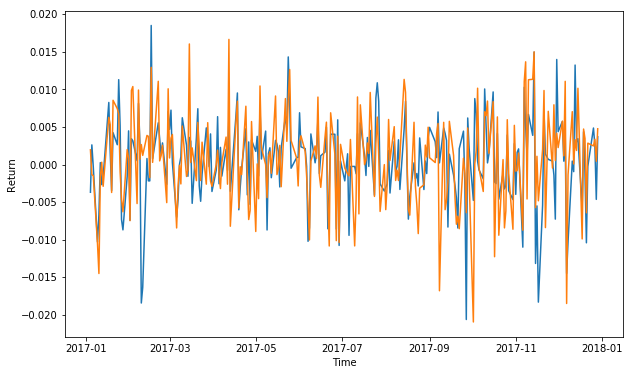

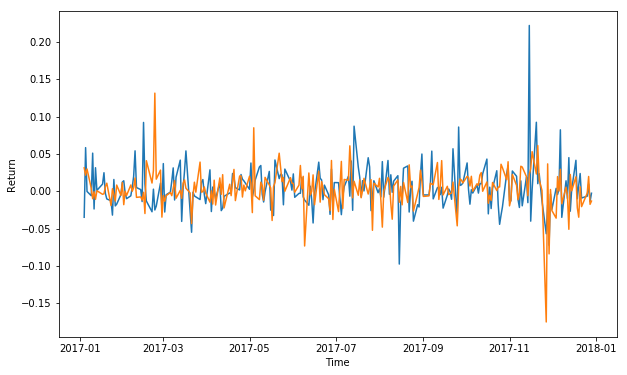

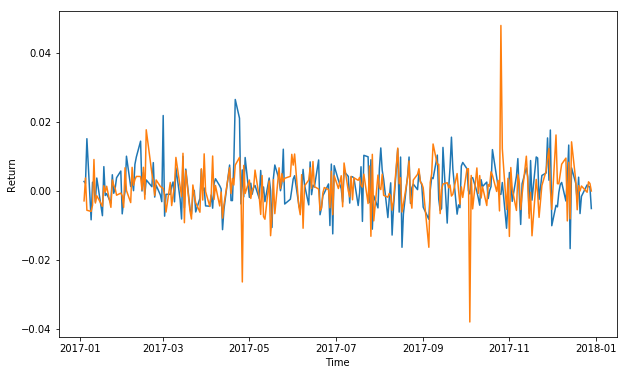

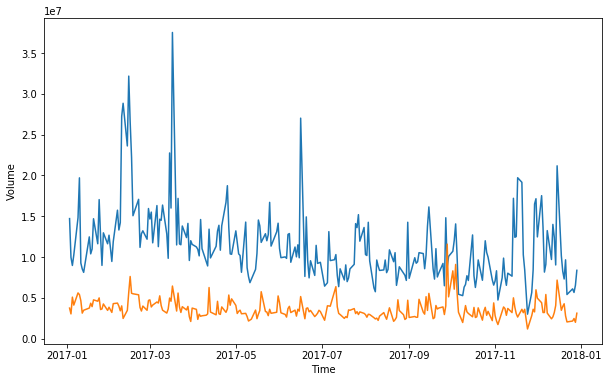

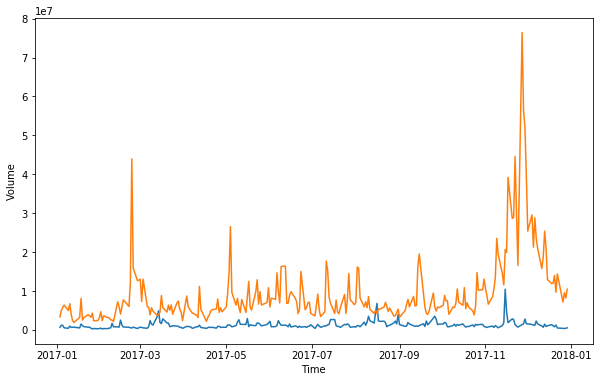

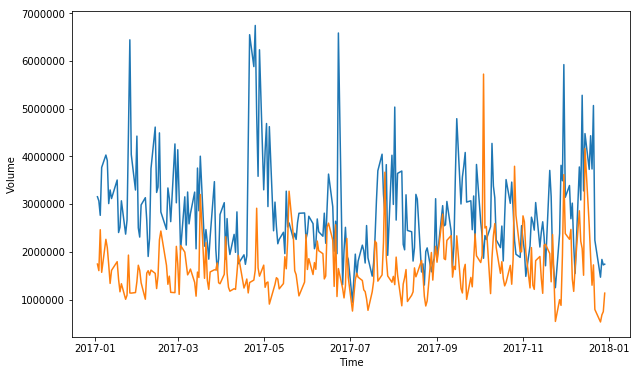

In [14]:
def plot_smth(Tickers,Column):
    plt.figure(figsize=(10,6))
    plt.xlabel("Time")
    plt.ylabel(Column)
    for Ticker in Tickers:
        returns = allFrames[Ticker][Column]
        array = returns.values
        time = returns.index.values
        plt.plot(time, array)
    plt.show()

plot_smth(['KO','PEP'],"Return") # Customer
plot_smth(['YY','SQ'], "Return") # Tech
#plot_smth(['BHF','CMS'], "Return") # Finance
plot_smth(['HON','WM'], "Return") # Industrials


plot_smth(['KO','PEP'],"Volume") # Customer
plot_smth(['YY','SQ'], "Volume") # Tech
#plot_smth(['BHF','CMS'], "Volume") # Finance
plot_smth(['HON','WM'], "Volume") # Industrials

# Task 5

In [15]:
returns = []
for tick in allTickers:
    ret,risk = get_return_info(tick)
    returns.append([ret, tick, allFrames[tick].shape[0]])
returns.sort()
returns[:7], returns[-7:]

([[-0.007580104312865131, 'FTR', 251],
  [-0.0036014016149225458, 'AVP', 251],
  [-0.003319437829542269, 'MNK', 251],
  [-0.003251169123122832, 'ENDP', 251],
  [-0.0029101810377689563, 'UAA', 251],
  [-0.0026382249444956347, 'UA', 251],
  [-0.0025746247068904934, 'RRC', 251]],
 [[0.0027754716052474536, 'MLCO', 251],
  [0.0027987403755705595, 'FSLR', 251],
  [0.0033169373974853665, 'ALGN', 251],
  [0.003382130539450538, 'NRG', 251],
  [0.003649150173095643, 'WB', 251],
  [0.003681927169102926, 'SQ', 251],
  [0.004211538415821045, 'YY', 251]])

## Зависимость между доходностями
### Разные производственные сектора

In [16]:
import numpy as np 

def get_correlation_return(tic1, tic2):
    ret1 = allFrames[tic1]["Return"][1:]
    ret2 = allFrames[tic2]["Return"][1:]
    print("Correlation between {} and {} returns is {:.2f}".format(tic1, tic2, np.corrcoef(ret1,ret2)[0,1]))
    plt.scatter(ret1,ret2, c = 'green')
    plt.xlabel("Ticker 1")
    plt.ylabel("Ticker 2")
    plt.show()

Correlation between SWN and ALGN returns is -0.02


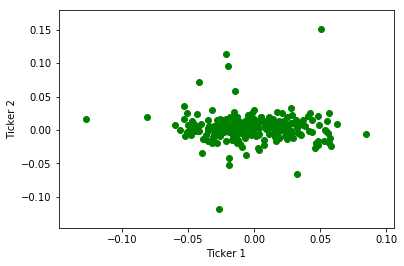

In [18]:
get_correlation_return("SWN","ALGN") # energy and healthcare, wide gap between returns
Разница между доходностями SWN и ALGN (производственные сектора энергия и здоровье) очень большая. 
Скорее всего, из-за этого и разных производственных сфер коэффициент корреляции -0.02 близок к 0. 
Это позволяет говорить о независимости доходностей этих активов.

Correlation between ALGN and NRG returns is 0.10


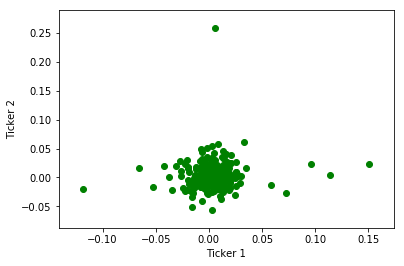

In [19]:
get_correlation_return("ALGN","NRG") # healthcare and utilities(energy), narrow gap between returns
Если же взять близкие по значению средней доходности акции, то корреляция возрастает. 
Однако ее маленькое значение (0.1) все равно не позволяет говорить о зависимости признаков.

### Один производственный сектор

Correlation between MNK and ALGN returns is -0.00


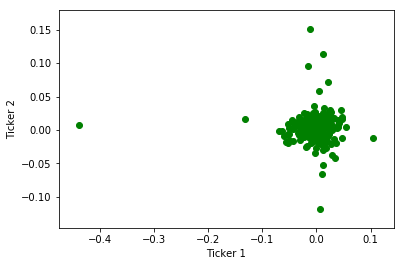

In [20]:
get_correlation_return("MNK", "ALGN") # healthcare, wide gap between returns
При анализе активов из одного сектора (здоровье), но с большим различием в средних 
доходностях обнаружена линейная независимость их доходностей (коэффициент корреляции = 0).
График зависимости доходностей активов MNK и ALGN показывает, что основная масса наблюдений 
формирует шарообразную область вокруг нулевой доходности.

Correlation between SQ and YY returns is 0.21


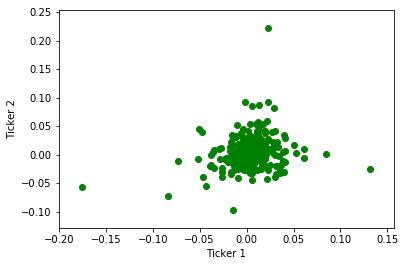

In [21]:
get_correlation_return("SQ", "YY") # technology, narrow gap between returns
У активов SQ и YY (технологии) с маленьким расстоянием между доходностями коэффициент корреляции возрастает до 0.21.
Это позволяет говорить о небольшом влиянии на доходность друг друга или же зависимость от внешних обстоятельств.

Correlation between FB and GOOGL returns is 0.70


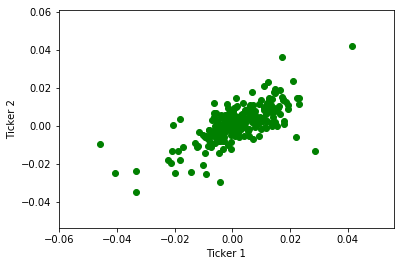

In [22]:
get_correlation_return("FB", "GOOGL") #Facebook and google, technology
Коэффициент корреляции 0.7 между доходностями акций Facebook и Google говорит о сильной, 
линейной зависимости, что так же заметно на графике.

In [ ]:
Таким образом, за наличие зависимости между доходностями компаний отвечает:
разница между средними доходностями, 
отношение к одному производственному сектору
взаимотношение компаний на рынке (конкуренция или сотрудничество)

## Зависимость между доходностями и объемами продаж

In [23]:
def get_cor_return_volume(tic):
    ret = allFrames[tic]["Return"][1:]
    volume = allFrames[tic]["Volume"][1:]
    print("Correlation between return and volume of {} is {:.2f}".format(tic, np.corrcoef(ret,volume)[0,1]))
    plt.scatter(ret,volume, c = 'green')
    plt.xlabel("Return")
    plt.ylabel("Volume")
    plt.show()

Correlation between return and volume of INTC is 0.23


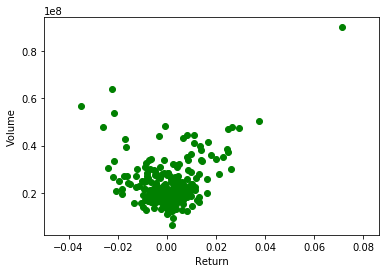

In [24]:
#technology
get_cor_return_volume("INTC") 

Correlation between return and volume of XOM is 0.07


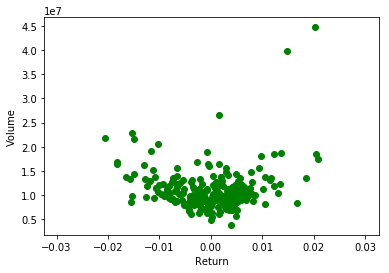

In [25]:
#energy
get_cor_return_volume("XOM") 

Correlation between return and volume of VZ is 0.04


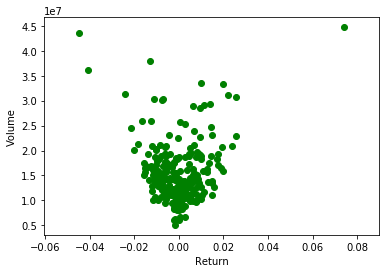

In [26]:
# Communication Services
get_cor_return_volume("VZ") 

Correlation between return and volume of JNJ is 0.12


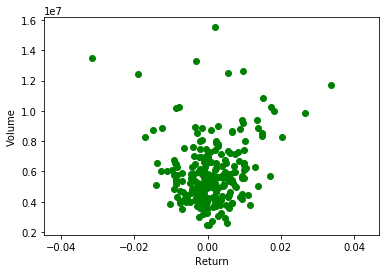

In [27]:
# Healthcare
get_cor_return_volume("JNJ") 

Correlation between return and volume of V is 0.06


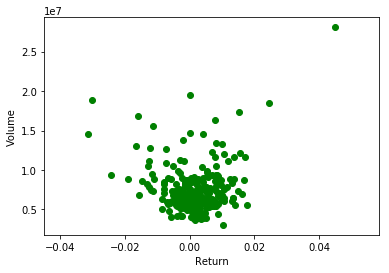

In [28]:
# Financial Services
get_cor_return_volume("V") #Visa

Correlation between return and volume of CCI is 0.17


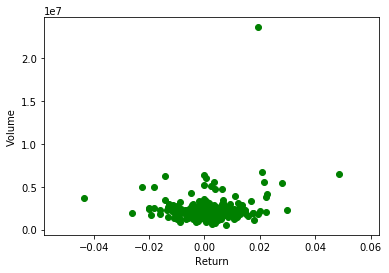

In [29]:
# Real Estate - недвижимость
get_cor_return_volume("CCI")

In [ ]:
Доходности и объемы продаж компаний из разных секторов линейно независимы. 
Об этом говорит незначительный коэффициент корреляции (не более 0.2 по модулю).
Но на графике точки расположены в виде "галочки" и симметричны относительно оси нулевой доходности 
с максимальной плотностью в этой области.
Это значит, что покупка и продажа в больших объемах приходилась на сильные изменения в доходностях. 
То есть акции массово покупались, когда их доходность росла и продавались в противном случае. 
Такой вывод соотносится с наблюдаемым маленьким значением коэффициента корреляции.

# Task 6

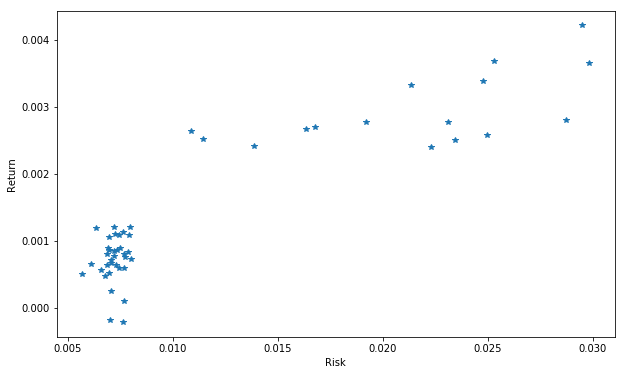

In [32]:
Tickers = find_good_actives(allRisks,allReturns,50)
plot_for_tickers(Tickers)

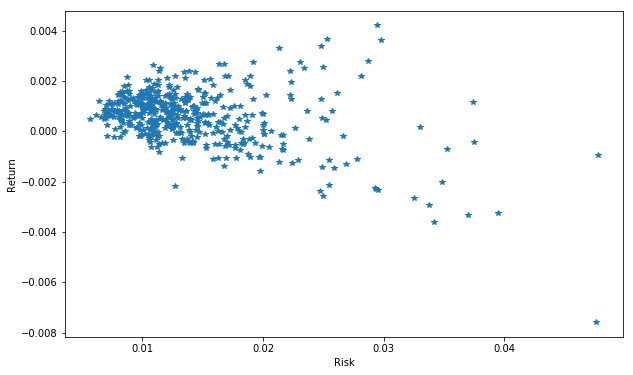

In [33]:
allReturns = []
allRisks = []
for tick in allTickers:
    ret,risk = get_return_info(tick)
    allReturns.append(ret)
    allRisks.append(risk)

plt.figure(figsize=(10,6))
plt.xlabel("Risk")
plt.ylabel("Return")
plt.plot(allRisks, allReturns,"*")
plt.show()

In [34]:
def covar_coefs(tic1,tic2):
    ret1 = allFrames[tic1]["Return"][1:]
    ret2 = allFrames[tic2]["Return"][1:]
    Rets = np.stack((ret1,ret2))
    Mat = np.cov(Rets)
    return np.cov(Rets)[0][1] #cov btw 1 and 2

In [35]:
from cvxopt import matrix, solvers

def get_optimal_pack(Tickers):
    C = [[covar_coefs(T2,T1) for T1 in Tickers] for T2 in Tickers] #sigma covar matrix
    
    lambdas=[]
    n = len(Tickers)
    for i in range(0,100,5):
        E0 = i / 1000
        print("E0 {}\n\n".format(E0))

        Q = 2*matrix(C)
        G = []
        for ticker in Tickers:
            E,_ = get_return_info(ticker)
            G.append(-1 * E)

        p = matrix([0.0 for i in range(n)])


        G = np.array(G).reshape(-1,1).T
        G = matrix(G)
        h = matrix(-1 * E0)

        A = np.array([1.0 for i in range(n)]).reshape(-1,1).T
        A = matrix(A)
        b = matrix(1.0)

        sol=solvers.qp(Q, p, G, h, A, b)
        X = []
        for i in sol['x']:
            X.append(i)

        Es = []
        for ticker in Tickers:
            E,_ = get_return_info(ticker)
            Es.append(E)
        #Доходность портфеля
        Rp = sum([X[i]*Es[i] for i in range(n)])
        #Риск
        sigma2 = []
        for i in range(n):
            for j in range(n):
                sigma2.append(X[i]*X[j]* C[i][j])
        sigma2 = sum(sigma2)

        print(Rp,sigma2)
        lambdas.append([Rp,sigma2])
    return lambdas

def get_optimal_pack_long_only(Tickers):
    C = [[covar_coefs(T2,T1) for T1 in Tickers] for T2 in Tickers] #sigma covar matrix
    
    lambdas=[]
    n = len(Tickers)
    for i in range(0,43,1):
        E0 = i / 10000
        print("E0 {}\n\n".format(E0))

        Q = 2*matrix(C)
        p = matrix([0.0 for i in range(n)])
        G = []
        for ticker in Tickers:
            E,_ = get_return_info(ticker)
            G.append(-1 * E)

        G = [G] + np.diag([-1.0 for i in range(n)]).tolist()
        G = np.array(G).reshape(n+1,n)
        G = matrix(G)
        h = matrix([-1 * E0] + [0.0 for i in range(n)])

        A = np.array([1.0 for i in range(n)]).reshape(-1,1).T
        A = matrix(A)
        b = matrix(1.0)

        sol=solvers.qp(Q, p, G, h, A, b)
        X = []
        for i in sol['x']:
            X.append(i)

        Es = []
        for ticker in Tickers:
            E,_ = get_return_info(ticker)
            Es.append(E)
        #Доходность портфеля
        Rp = sum([X[i]*Es[i] for i in range(n)])
        #Риск
        sigma2 = []
        for i in range(n):
            for j in range(n):
                sigma2.append(X[i]*X[j]* C[i][j])
        sigma2 = sum(sigma2)

        print(Rp,sigma2)
        lambdas.append([Rp,sigma2])
    return lambdas

In [36]:
def plot_optimal_pack(lambdas):
    rets=[]
    risks=[]
    Xes = [X for [Y,X] in lambdas]
    Yes = [Y for [Y,X] in lambdas]
    for tick in Tickers:
        ret,risk = get_return_info(tick)
        rets.append(ret)
        risks.append(risk)

    plt.figure(figsize=(10,6))
    plt.xlabel("Risk")
    plt.ylabel("Return")
    plt.plot(risks, rets,"*")
    plt.plot(Xes,Yes)
    plt.show()

In [37]:
lambdas = get_optimal_pack(Tickers)

E0 0.0


     pcost       dcost       gap    pres   dres
 0:  7.7066e-06 -6.5018e-04  7e-04  7e-17  1e-02
 1:  7.7061e-06  1.1187e-06  7e-06  4e-19  1e-04
 2:  7.6857e-06  7.6154e-06  7e-08  1e-20  5e-06
 3:  7.6813e-06  7.6806e-06  7e-10  1e-16  4e-08
Optimal solution found.
0.0007345712035010671 7.681323587236919e-06
E0 0.005


     pcost       dcost       gap    pres   dres
 0:  8.5340e-06  2.3115e-05  4e-03  1e+00  5e-20
 1:  8.5470e-06  2.3225e-05  4e-05  1e-02  5e-20
 2:  9.9542e-06  3.1998e-05  6e-07  4e-03  5e-20
 3:  1.5214e-04  7.5207e-05  8e-05  6e-17  5e-19
 4:  9.0190e-05  8.5379e-05  5e-06  2e-16  4e-19
 5:  8.5496e-05  8.5449e-05  5e-08  5e-16  2e-19
Optimal solution found.
0.005001280951019417 8.549582311970184e-05
E0 0.01


     pcost       dcost       gap    pres   dres
 0:  1.1705e-05  8.0512e-05  8e-03  1e+00  6e-20
 1:  1.1838e-05  8.1634e-05  8e-05  2e-02  6e-20
 2:  2.7519e-05  1.5849e-04  2e-06  7e-03  1e-19
 3:  4.5263e-04  3.7090e-04  8e-05  1e-15  6e-18
 4:  

0.0950000109811303 0.037994340337987806


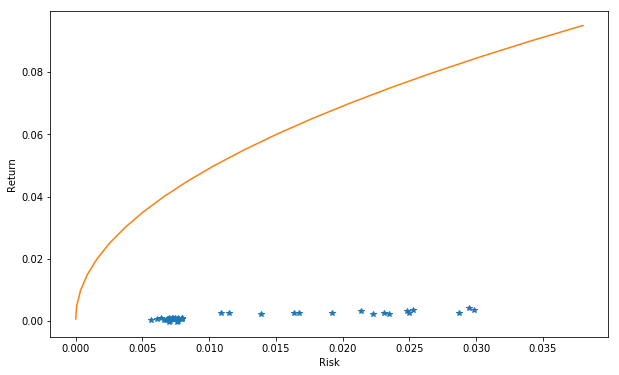

In [38]:
plot_optimal_pack(lambdas)

In [39]:
lambdas_long_only = get_optimal_pack_long_only(Tickers)

E0 0.0


     pcost       dcost       gap    pres   dres
 0:  2.0105e-05 -1.0015e+00  1e+00  1e-17  7e+00
 1:  2.0104e-05 -1.0025e-02  1e-02  2e-16  7e-02
 2:  1.9941e-05 -1.1061e-04  1e-04  2e-16  9e-04
 3:  1.5556e-05 -4.8645e-06  2e-05  3e-16  1e-04
 4:  1.0883e-05 -1.8346e-06  1e-05  1e-16  6e-20
 5:  1.0122e-05  6.8639e-06  3e-06  1e-16  4e-20
 6:  9.4829e-06  8.9276e-06  6e-07  2e-16  3e-20
 7:  9.2970e-06  9.2479e-06  5e-08  3e-17  3e-20
Optimal solution found.
0.0008016084734105595 9.296999864539192e-06
E0 0.0001


     pcost       dcost       gap    pres   dres
 0:  2.0105e-05 -1.0014e+00  1e+00  3e-16  7e+00
 1:  2.0104e-05 -1.0024e-02  1e-02  1e-16  7e-02
 2:  1.9941e-05 -1.1059e-04  1e-04  3e-17  9e-04
 3:  1.5556e-05 -4.8603e-06  2e-05  3e-17  1e-04
 4:  1.0884e-05 -1.8294e-06  1e-05  1e-16  5e-20
 5:  1.0123e-05  6.8654e-06  3e-06  9e-17  5e-20
 6:  9.4827e-06  8.9284e-06  6e-07  4e-16  3e-20
 7:  9.2970e-06  9.2479e-06  5e-08  6e-16  3e-20
Optimal solution found.
0.00080

     pcost       dcost       gap    pres   dres
 0:  2.0108e-05 -9.9984e-01  5e+01  7e+00  7e+00
 1:  2.0211e-05 -9.6142e-01  1e+00  7e-02  7e-02
 2:  2.0241e-05 -1.4243e-01  1e-01  2e-03  2e-03
 3:  2.2247e-05 -6.3236e-02  6e-02  6e-04  6e-04
 4:  2.4584e-05 -1.8427e-03  2e-03  1e-05  1e-05
 5:  2.4282e-05 -4.2338e-05  7e-05  4e-07  4e-07
 6:  1.8607e-05  6.2435e-07  2e-05  7e-16  3e-17
 7:  1.5949e-05  1.1279e-05  5e-06  6e-16  8e-19
 8:  1.4882e-05  1.4051e-05  8e-07  4e-17  5e-19
 9:  1.4567e-05  1.4439e-05  1e-07  4e-17  9e-19
10:  1.4499e-05  1.4494e-05  5e-09  3e-16  2e-18
Optimal solution found.
0.001600003275022666 1.449938457522214e-05
E0 0.0017


     pcost       dcost       gap    pres   dres
 0:  2.0108e-05 -9.9974e-01  5e+01  7e+00  7e+00
 1:  2.0211e-05 -9.6132e-01  1e+00  7e-02  7e-02
 2:  2.0242e-05 -1.5257e-01  2e-01  3e-03  3e-03
 3:  2.3409e-05 -8.7594e-02  9e-02  1e-03  1e-03
 4:  2.7805e-05 -5.3982e-03  5e-03  3e-05  3e-05
 5:  2.7744e-05 -8.0379e-05  1e-04  6e-07

     pcost       dcost       gap    pres   dres
 0:  2.0110e-05 -9.9830e-01  5e+01  7e+00  7e+00
 1:  2.0213e-05 -9.5999e-01  2e+00  8e-02  8e-02
 2:  2.0253e-05 -2.7811e-01  3e-01  1e-02  1e-02
 3:  3.6106e-05 -1.0967e-01  3e-01  1e-02  1e-02
 4:  8.8640e-05 -1.5563e-01  2e-01  8e-03  8e-03
 5:  3.5668e-04 -7.7054e-02  8e-02  1e-16  1e-15
 6:  3.5470e-04 -1.1921e-03  2e-03  1e-16  4e-16
 7:  2.8350e-04 -3.5718e-04  6e-04  2e-16  1e-16
 8:  1.8517e-04 -6.0742e-04  8e-04  3e-16  2e-17
 9:  1.5086e-04 -1.7645e-05  2e-04  3e-16  2e-17
10:  9.9106e-05 -6.9091e-05  2e-04  6e-17  1e-16
11:  8.9585e-05  5.2594e-05  4e-05  2e-16  5e-17
12:  8.8678e-05  5.7409e-05  3e-05  9e-17  1e-16
13:  8.0905e-05  7.5338e-05  6e-06  9e-17  5e-17
14:  7.8456e-05  7.8003e-05  5e-07  1e-16  5e-17
15:  7.8124e-05  7.8114e-05  1e-08  8e-17  5e-17
Optimal solution found.
0.0031000008267369357 7.812422566470556e-05
E0 0.0032


     pcost       dcost       gap    pres   dres
 0:  2.0110e-05 -9.9820e-01  5e+01  7e+0

     pcost       dcost       gap    pres   dres
 0:  2.0111e-05 -9.9728e-01  5e+01  7e+00  7e+00
 1:  2.0215e-05 -9.5903e-01  2e+00  9e-02  9e-02
 2:  2.0262e-05 -3.5197e-01  4e-01  2e-02  2e-02
 3:  3.7346e-05 -1.7454e-02  4e-01  2e-02  2e-02
 4:  8.1483e-05 -1.0273e-01  4e-01  2e-02  2e-02
 5:  6.5150e-04 -1.8707e-01  3e-01  5e-03  5e-03
 6:  8.1301e-04 -1.2566e-02  2e-02  2e-04  2e-04
 7:  8.2273e-04  1.6115e-04  7e-04  2e-06  2e-06
 8:  8.0937e-04  5.7615e-04  2e-04  5e-07  5e-07
 9:  7.5368e-04  5.2383e-04  2e-04  5e-07  5e-07
10:  6.5457e-04  6.0878e-04  5e-05  1e-08  1e-08
11:  6.7068e-04  5.5615e-04  1e-04  4e-09  4e-09
12:  6.6976e-04  5.9818e-04  7e-05  3e-10  3e-10
13:  6.3982e-04  6.1608e-04  2e-05  1e-16  2e-15
14:  6.2321e-04  6.2256e-04  6e-07  1e-16  2e-15
15:  6.2279e-04  6.2279e-04  7e-09  2e-16  1e-14
Optimal solution found.
0.0041000000397890665 0.0006227949924448746
E0 0.0042


     pcost       dcost       gap    pres   dres
 0:  2.0111e-05 -9.9718e-01  5e+01  7e+0

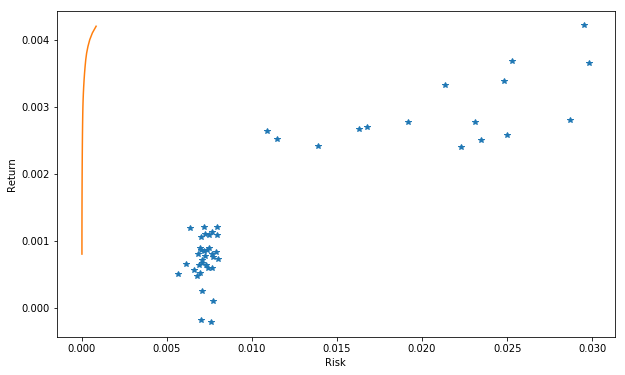

In [40]:
plot_optimal_pack(lambdas_long_only)

# Task 7 #

In [41]:
best_tickers = sorted([[get_return_info(tic), tic] for tic in Tickers])[-15:]
best_tickers = [tic for _,tic in best_tickers]
print(best_tickers)

['PYPL', 'AA', 'DHI', 'NVDA', 'BA', 'BABA', 'WYNN', 'VRTX', 'MLCO', 'FSLR', 'ALGN', 'NRG', 'WB', 'SQ', 'YY']


In [42]:
# формируем портфель из 15 самых доходных акций из списка лучших, сформированного ранее, полностью пренебрегая риском

In [43]:
lambdas = get_optimal_pack(best_tickers)

E0 0.0


     pcost       dcost       gap    pres   dres
 0:  4.9616e-05 -2.5860e-03  3e-03  2e-16  1e-02
 1:  4.9604e-05  2.3178e-05  3e-05  1e-16  1e-04
 2:  4.9601e-05  4.9337e-05  3e-07  3e-18  1e-06
 3:  4.9601e-05  4.9599e-05  3e-09  7e-18  1e-08
Optimal solution found.
0.0026471276860259817 4.9601349693069764e-05
E0 0.005


     pcost       dcost       gap    pres   dres
 0:  4.9613e-05  5.5101e-05  2e-03  1e+00  6e-20
 1:  4.9613e-05  5.5127e-05  2e-05  1e-02  6e-20
 2:  4.9626e-05  5.7436e-05  3e-07  2e-03  4e-20
 3:  3.9969e-03 -7.3119e-04  5e-03  2e-15  1e-18
 4:  1.2113e-03  6.0573e-04  6e-04  4e-16  5e-18
 5:  7.2104e-04  6.8414e-04  4e-05  4e-16  6e-18
 6:  6.8501e-04  6.8465e-04  4e-07  3e-16  4e-18
 7:  6.8465e-04  6.8465e-04  4e-09  4e-16  1e-18
Optimal solution found.
0.005000006648412691 0.0006846522320424326
E0 0.01


     pcost       dcost       gap    pres   dres
 0:  4.9718e-05  1.0331e-04  7e-03  1e+00  6e-20
 1:  4.9722e-05  1.0409e-04  7e-05  2e-02  6e-20
 2: 

 3:  1.2048e+00  8.4911e-01  4e-01  1e-14  8e-15
 4:  8.8515e-01  8.7534e-01  1e-02  2e-14  2e-16
 5:  8.7546e-01  8.7536e-01  1e-04  5e-15  1e-16
 6:  8.7536e-01  8.7536e-01  1e-06  6e-17  1e-16
 7:  8.7536e-01  8.7536e-01  1e-08  2e-14  9e-17
Optimal solution found.
0.09000000048699282 0.8753636568564062
E0 0.095


     pcost       dcost       gap    pres   dres
 0:  6.8028e-05  8.5232e-03  9e-02  1e+00  1e-19
 1:  7.5012e-05  9.9964e-03  1e-03  1e-01  2e-19
 2:  6.6929e-03  1.5465e-01  2e-04  8e-02  6e-18
 3:  1.2471e+00  9.6216e-01  3e-01  1e-14  3e-15
 4:  9.8365e-01  9.7843e-01  5e-03  3e-14  9e-17
 5:  9.7849e-01  9.7844e-01  5e-05  5e-15  5e-17
 6:  9.7844e-01  9.7844e-01  5e-07  7e-15  2e-16
Optimal solution found.
0.09500002458397752 0.9784363534700877


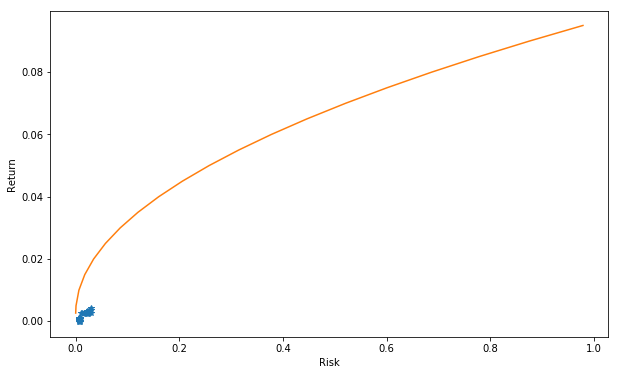

In [44]:
plot_optimal_pack(lambdas)

In [45]:
Оптимальный портфель на 15 выбранных активах при разрешении коротких позиций выглядит следующим образом. 
Из выбранных активов можно получить портфель той же доходности, что при испрользовании всего набора активов (0.095)
Однако при данном наборе, высшая доходность достигается при почти 100% вероятности провала (sigma=0.97),
В то время как на полном наборе риск достигает только 40%
Это связано с тем, что все 15 акций обладают очень высоким риском относительно не отобранных 35 акций 
(0.021 в среднем)
Однако, как и в случае с полным набором, можно собрать портфель с минимальным риском (0.0007) 
и маленькой доходностью 0.005 благодаря разрешению коротких продаж

SyntaxError: invalid syntax (<ipython-input-45-d4c753d35ec6>, line 1)

In [46]:
sigmas = [sig for (e,sig),tic in sorted([[get_return_info(tic), tic] for tic in Tickers])[-15:]]
print("Mean risk value is ", np.mean(sigmas))

Mean risk value is  0.021296194180402166


In [47]:
lambdas_long_only = get_optimal_pack_long_only(best_tickers)

E0 0.0


     pcost       dcost       gap    pres   dres
 0:  1.0306e-04 -1.0032e+00  1e+00  4e-16  4e+00
 1:  1.0304e-04 -1.0080e-02  1e-02  8e-17  4e-02
 2:  1.0188e-04 -1.4751e-04  2e-04  5e-17  1e-03
 3:  6.8207e-05  7.3045e-06  6e-05  2e-16  9e-05
 4:  5.3338e-05  4.3471e-05  1e-05  9e-17  1e-19
 5:  5.0872e-05  4.9875e-05  1e-06  2e-16  7e-20
 6:  5.0467e-05  5.0399e-05  7e-08  8e-17  5e-20
Optimal solution found.
0.0026755718332171228 5.046696800267202e-05
E0 0.0001


     pcost       dcost       gap    pres   dres
 0:  1.0306e-04 -1.0031e+00  1e+00  5e-19  4e+00
 1:  1.0304e-04 -1.0079e-02  1e-02  4e-17  4e-02
 2:  1.0188e-04 -1.4749e-04  2e-04  1e-16  1e-03
 3:  6.8208e-05  7.3121e-06  6e-05  1e-16  9e-05
 4:  5.3338e-05  4.3471e-05  1e-05  8e-17  1e-19
 5:  5.0872e-05  4.9875e-05  1e-06  1e-16  6e-20
 6:  5.0467e-05  5.0399e-05  7e-08  2e-16  4e-20
Optimal solution found.
0.0026755718055702024 5.046696731206252e-05
E0 0.0002


     pcost       dcost       gap    pres   dres
 

     pcost       dcost       gap    pres   dres
 0:  1.0306e-04 -1.0009e+00  1e+00  3e-17  4e+00
 1:  1.0304e-04 -1.0057e-02  1e-02  8e-17  4e-02
 2:  1.0189e-04 -1.4692e-04  2e-04  2e-16  1e-03
 3:  6.8236e-05  7.8362e-06  6e-05  3e-16  9e-05
 4:  5.3343e-05  4.3510e-05  1e-05  1e-16  1e-19
 5:  5.0871e-05  4.9868e-05  1e-06  7e-17  8e-20
 6:  5.0467e-05  5.0399e-05  7e-08  6e-17  6e-20
Optimal solution found.
0.0026755688860968124 5.046675811948067e-05
E0 0.0023


     pcost       dcost       gap    pres   dres
 0:  1.0306e-04 -1.0008e+00  1e+00  4e-16  4e+00
 1:  1.0304e-04 -1.0055e-02  1e-02  8e-17  4e-02
 2:  1.0189e-04 -1.4690e-04  2e-04  6e-17  1e-03
 3:  6.8239e-05  7.9388e-06  6e-05  1e-16  9e-05
 4:  5.3346e-05  4.3523e-05  1e-05  1e-16  2e-19
 5:  5.0870e-05  4.9865e-05  1e-06  2e-16  6e-20
 6:  5.0467e-05  5.0399e-05  7e-08  2e-16  4e-20
Optimal solution found.
0.002675568480154287 5.046669751740299e-05
E0 0.0024


     pcost       dcost       gap    pres   dres
 0:  1.0306

0.004000000063907097 0.000469272853849288
E0 0.0041


     pcost       dcost       gap    pres   dres
 0:  1.0306e-04 -9.9884e-01  2e+01  4e+00  4e+00
 1:  1.0319e-04 -8.7937e-01  1e+00  4e-02  5e-02
 2:  1.0323e-04 -1.1729e-01  1e-01  5e-03  5e-03
 3:  1.1283e-04 -6.9536e-02  1e-01  4e-03  4e-03
 4:  1.3341e-04 -1.3312e-01  1e-01  4e-03  4e-03
 5:  2.5517e-04 -1.4935e-02  1e-01  3e-03  4e-03
 6:  7.3797e-04 -1.7648e-02  2e-02  1e-05  1e-05
 7:  7.4117e-04  3.7386e-04  4e-04  3e-07  3e-07
 8:  7.1757e-04  5.7126e-04  1e-04  8e-08  9e-08
 9:  6.4001e-04  5.5475e-04  9e-05  3e-16  6e-16
10:  6.2775e-04  6.1552e-04  1e-05  2e-16  1e-16
11:  6.2334e-04  6.2250e-04  8e-07  1e-16  4e-16
12:  6.2280e-04  6.2279e-04  8e-09  2e-16  9e-16
Optimal solution found.
0.004100000230837862 0.0006227963095033035
E0 0.0042


     pcost       dcost       gap    pres   dres
 0:  1.0306e-04 -9.9874e-01  2e+01  4e+00  4e+00
 1:  1.0319e-04 -8.7929e-01  1e+00  4e-02  5e-02
 2:  1.0323e-04 -1.2477e-01  1e-01  

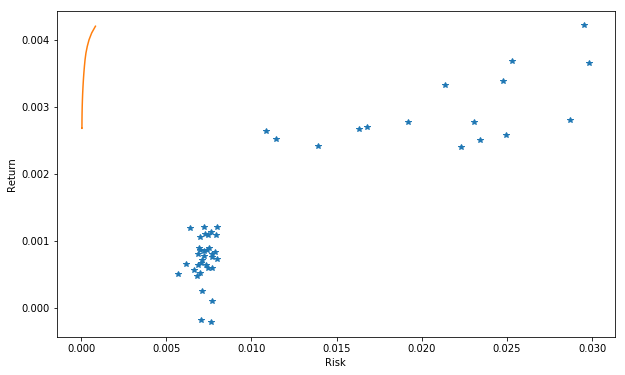

In [48]:
plot_optimal_pack(lambdas_long_only)

In [ ]:
При запрете коротких позиций оптимальный фронт оригинального и сокращенного набора активов выглядят аналогично 
и достигают маленькой, стабильной доходности в 0.0042 при риске в 0.0008.
Это значит, что набор активов, в который вкладываются максимально, остался тем же и в том, и в другом наборе
Капитал для максимальной доходности в обоих случаях распределяется следующим образом: 97% идет в YY (China Technology, return = 0.0042, risk = 0.03),
2% в SQ, а 1% распределяется между оставшимися акциями.
При убирании актива компании YY из набора, лучший доход падает до 0.0035 при риске в 0.0002, 
а доли капитала распределяются равномернее между активами: по 20% на ALGN, NRG, WB и 30% на SQ.
    
Таким образом, при запрете коротких позиций, портфель получается более "стабильным", 
то есть предлагает стабильный, но маленький доход при отсутствующем риске.